C:\Users\malko\anaconda3\envs\py38_64\lib\site-packages\pygad\pygad.py:503: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = 4.453856400469554
Change     = 4.453856400469554
Generation = 2
Fitness    = 14.864528316556061
Change     = 10.410671916086507
Generation = 3
Fitness    = 83.2414075453228
Change     = 68.37687922876674
Generation = 4
Fitness    = 83.2414075453228
Change     = 0.0
Generation = 5
Fitness    = 83.2414075453228
Change     = 0.0
Generation = 6
Fitness    = 83.2414075453228
Change     = 0.0
Generation = 7
Fitness    = 83.2414075453228
Change     = 0.0
Generation = 8
Fitness    = 83.2414075453228
Change     = 0.0
Generation = 9
Fitness    = 129.5588953839022
Change     = 46.31748783857941
Generation = 10
Fitness    = 129.5588953839022
Change     = 0.0
Generation = 11
Fitness    = 129.5588953839022
Change     = 0.0
Generation = 12
Fitness    = 129.5588953839022
Change     = 0.0
Generation = 13
Fitness    = 129.5588953839022
Change     = 0.0
Generation = 14
Fitness    = 129.5588953839022
Change     = 0.0
Generation = 15
Fitness    = 129.5588953839022
Change     = 0

C:\Users\malko\anaconda3\envs\py38_64\lib\site-packages\pygad\pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


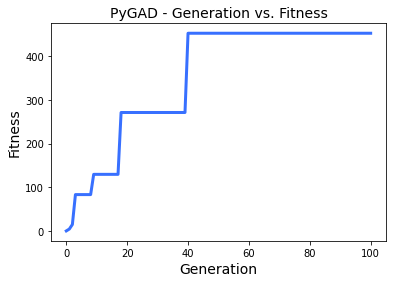

Parameters of the best solution : [ 6.48469575 -0.74127257  0.56930368  4.40548341  0.2321649   1.03942201]
Fitness value of the best solution = 452.35766715652284
Index of the best solution : 0
Predicted output based on the best solution : 44.002210640103186
Best fitness value reached after 40 generations.
Generation = 1
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 2
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 3
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 4
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 5
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 6
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 7
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 8
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 9
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 10
Fitness    = 452.35766715652284
Change     = 0.0
Generation = 11
Fitness    = 452.35766715652284
Ch

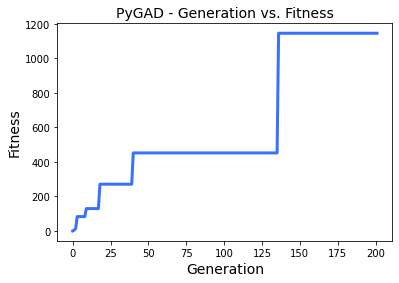

array([ 6.48469575, -0.25723356,  0.61033299,  4.71208993,  0.2321649 ,
        1.19083483])

In [3]:
import pygad
import numpy

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 7 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)
# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.run()
loaded_ga_instance.plot_result()
solution, solution_fitness, solution_idx = loaded_ga_instance.best_solution()
solution